In [1]:
import pandas as pd
import numpy as np
from feature_engine import imputation as mdi
from feature_engine.encoding import CountFrequencyEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [7]:
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
from imblearn.under_sampling import RandomUnderSampler

In [84]:
df = pd.read_csv('z_train.csv')

In [85]:
df.drop(columns= ['enrollee_id'], inplace=True)

In [86]:
df.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1.0


In [87]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='target'), df.target, train_size=0.8)

In [88]:
undersampler = RandomUnderSampler()

In [89]:
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

NULOS CAT

In [90]:
categorico_nulos=mdi.CategoricalImputer('frequent', variables = ['gender', 'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job'])

In [91]:
df_sin_nulos=categorico_nulos.fit_transform(X_train_under)

In [92]:
df_sin_nulos.isnull().sum()

city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64

In [12]:
1-0.23207

0.76793

ORDINALES

In [93]:
df_transformado = df_sin_nulos.copy()
df_transformado.head(2)

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,city_23,0.899,Female,Has relevent experience,Part time course,Graduate,STEM,5,10000+,Pvt Ltd,3,69
1,city_138,0.836,Male,No relevent experience,no_enrollment,High School,STEM,9,50-99,Pvt Ltd,never,36


In [94]:
relevent_experience = preprocessing.OrdinalEncoder(categories = [['No relevent experience', 'Has relevent experience']], handle_unknown='use_encoded_value', unknown_value = -1)
df_transformado['relevent_experience']=relevent_experience.fit_transform(df_transformado[['relevent_experience']])

In [95]:
education_level = preprocessing.OrdinalEncoder(categories = [['Primary School','High School', 'Graduate', 'Masters', 'Phd']])
df_transformado['education_level']=education_level.fit_transform(df_transformado[['education_level']])

In [16]:
sorted(df_transformado.experience.unique())

['1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '<1',
 '>20']

In [17]:
num = [str(i) for i in range(21)]
print(num)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20']


In [96]:
exp = preprocessing.OrdinalEncoder(categories = [['<1','1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20','>20']])
df_transformado['experience']=exp.fit_transform(df_transformado[['experience']])

In [97]:
categoricas= CountFrequencyEncoder(encoding_method = 'frequency',variables = ['city','gender', 'enrolled_university', 'major_discipline','company_size', 'company_type','last_new_job'] )
df_transformado = categoricas.fit_transform(df_transformado)

In [98]:
df_transformado

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,0.009061,0.899,0.066886,1.0,0.06112,2.0,0.907578,5.0,0.103130,0.845140,0.054860,69
1,0.004613,0.836,0.924382,0.0,0.70939,1.0,0.907578,9.0,0.515651,0.845140,0.136409,36
2,0.056178,0.926,0.924382,0.0,0.70939,3.0,0.907578,21.0,0.515651,0.049094,0.156837,15
3,0.219934,0.920,0.924382,1.0,0.70939,2.0,0.907578,21.0,0.072817,0.845140,0.449094,22
4,0.006755,0.893,0.924382,1.0,0.06112,1.0,0.907578,21.0,0.112850,0.845140,0.449094,94
...,...,...,...,...,...,...,...,...,...,...,...,...
6065,0.203295,0.624,0.924382,1.0,0.70939,2.0,0.907578,3.0,0.044646,0.845140,0.449094,80
6066,0.203295,0.624,0.924382,1.0,0.70939,2.0,0.907578,21.0,0.112850,0.845140,0.449094,122
6067,0.042834,0.920,0.924382,1.0,0.70939,2.0,0.907578,10.0,0.103130,0.845140,0.449094,57
6068,0.219934,0.920,0.924382,1.0,0.70939,2.0,0.012685,10.0,0.515651,0.845140,0.156837,31


ESCALADO

In [60]:
Robust = preprocessing.RobustScaler()

In [112]:
df_escalado = pd.DataFrame(Robust.fit_transform(df_transformado), columns=df_transformado.columns)

In [113]:
df_escalado.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,-0.242578,0.020270,-0.857496,0.0,-1.350841,0.0,0.0,-0.272727,-0.931548,0.000000,-0.340859,0.338462
1,-0.265479,-0.192568,0.000000,-1.0,0.000000,-1.0,0.0,0.090909,0.000000,0.000000,-0.068282,-0.169231
2,0.000000,0.111486,0.000000,-1.0,0.000000,1.0,0.0,1.181818,0.000000,-0.796046,0.000000,-0.492308
3,0.843087,0.091216,0.000000,0.0,0.000000,0.0,0.0,1.181818,-1.000000,0.000000,0.976872,-0.384615
4,-0.254453,0.000000,0.000000,0.0,-1.350841,-1.0,0.0,1.181818,-0.909598,0.000000,0.976872,0.723077


TESTEO

In [123]:
df_test=categorico_nulos.fit_transform(X_test)

In [124]:
df_test['relevent_experience']=relevent_experience.fit_transform(df_test[['relevent_experience']])

In [125]:
df_test['education_level']=education_level.fit_transform(df_test[['education_level']])

In [126]:
df_test['experience']=exp.fit_transform(df_test[['experience']])

In [127]:
df_test = categoricas.fit_transform(df_test)

In [109]:
df_test.head(2)

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
8822,0.003262,0.698,0.926288,0.0,0.197326,2.0,0.903131,5.0,0.469015,0.828767,0.126549,17
6028,0.040444,0.920,0.926288,0.0,0.197326,3.0,0.022179,17.0,0.105349,0.054795,0.446510,66


In [114]:
df_test = pd.DataFrame(Robust.transform(df_test), columns=df_test.columns)

# MODELO

In [26]:
from sklearn.model_selection import GridSearchCV

In [66]:
forest_grid = RandomForestClassifier()
params = {'n_estimators':[10,25, 50,75, 100], 'max_depth':[3, 10, 15,20]}
gridForest = GridSearchCV(forest_grid, params)

In [99]:
gridForest.fit(df_transformado, y_train_under)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 10, 15, 20],
                         'n_estimators': [10, 25, 50, 75, 100]})

In [100]:
gridForest.best_estimator_

RandomForestClassifier(max_depth=10, n_estimators=75)

In [158]:
Forest = RandomForestClassifier()

In [159]:
Forest.fit(df_transformado, y_train_under)

RandomForestClassifier()

In [160]:
Forest.score(df_transformado, y_train_under)

0.999505766062603

In [161]:
Forest.score(df_test, y_test)

0.7345075016307893

VERIOSN ROBUST ESCALE

In [115]:
gridForest.fit(df_escalado, y_train_under)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 10, 15, 20],
                         'n_estimators': [10, 25, 50, 75, 100]})

In [116]:
gridForest.best_estimator_

RandomForestClassifier(max_depth=10)

In [120]:
forest_2=RandomForestClassifier(max_depth=10)
forest_2.fit(df_escalado, y_train_under)

RandomForestClassifier(max_depth=10)

In [121]:
forest_2.score(df_escalado, y_train_under)

0.8172981878088962

In [122]:
forest_2.score(df_test, y_test)

0.7521200260926288

METRICAS

In [151]:
from sklearn import metrics
from matplotlib import pyplot as plt

In [162]:
y_predict = Forest.predict(df_test)

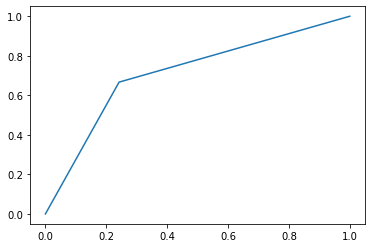

In [163]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_predict)
auc = metrics.roc_auc_score(y_test, y_predict)
plt.plot(fpr,tpr);

In [164]:
auc

0.712340799297321

# Z

In [128]:
z_test = pd.read_csv('z_test.csv')

In [129]:
identificación = z_test[['enrollee_id']]

In [130]:
z_test.drop(columns= ['enrollee_id'], inplace=True)

In [131]:
z_test=categorico_nulos.fit_transform(z_test)

In [132]:
z_test['relevent_experience']=relevent_experience.fit_transform(z_test[['relevent_experience']])

In [133]:
z_test['education_level']=education_level.fit_transform(z_test[['education_level']])

In [134]:
z_test['experience']=exp.fit_transform(z_test[['experience']])

In [135]:
z_test = categoricas.fit_transform(z_test)

In [136]:
z_test.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,0.045668,0.920,0.92667,0.0,0.200157,2.0,0.902662,5.0,0.479906,0.833246,0.434760,78
1,0.006002,0.890,0.92667,1.0,0.200157,1.0,0.902662,6.0,0.479906,0.833246,0.434760,36
2,0.007307,0.689,0.92667,0.0,0.738518,2.0,0.902662,5.0,0.479906,0.833246,0.132307,34
3,0.022443,0.855,0.06263,1.0,0.738518,3.0,0.902662,9.0,0.068372,0.833246,0.434760,149
4,0.223904,0.920,0.92667,1.0,0.738518,2.0,0.902662,16.0,0.479906,0.054541,0.151879,7


In [137]:
Forest.predict_proba(z_test)

array([[0.25405713, 0.74594287],
       [0.56002205, 0.43997795],
       [0.33945922, 0.66054078],
       ...,
       [0.53480319, 0.46519681],
       [0.70213361, 0.29786639],
       [0.70705335, 0.29294665]])

In [138]:
z_pred = pd.DataFrame(Forest.predict_proba(z_test))

In [139]:
submission9=pd.concat((identificación,z_pred[1]), axis=1)
submission9.head()

,enrollee_id,1
0,23603,0.745943
1,22499,0.439978
2,10465,0.660541
3,8293,0.224321
4,4246,0.427760


In [140]:
submission9.rename(columns = {1:'target'}, inplace=True)
submission9.to_csv('submission_9.csv',index=False)

In [46]:
submission8=pd.concat((identificación,z_pred[1]), axis=1)
submission8.head()

,enrollee_id,1
0,23603,0.733036
1,22499,0.448324
2,10465,0.712997
3,8293,0.221339
4,4246,0.426426


In [47]:
submission8.rename(columns = {1:'target'}, inplace=True)

In [53]:
submission8.to_csv('submission_8.csv',index=False)

In [141]:
from sklearn import feature_selection

In [165]:
selector = feature_selection.RFE(Forest, n_features_to_select=4)

In [167]:
selector.fit(df_transformado,y_train_under)
selector.ranking_

array([1, 1, 9, 8, 6, 4, 7, 1, 2, 5, 3, 1])

In [168]:
selector.get_feature_names_out()

array(['city', 'city_development_index', 'experience', 'training_hours'],
      dtype=object)

In [176]:
estadisticos, p_values=feature_selection.f_regression(df_escalado,y_train_under)

In [177]:
0.78625+0.21387

1.00012

In [178]:
pd.DataFrame(p_values, index=df_transformado.columns).sort_values(by=0)

,0
city_development_index,1.202749e-205
experience,8.855974e-64
company_size,1.260695e-52
city,9.651222e-50
enrolled_university,1.035968e-29
relevent_experience,1.550601e-29
company_type,2.291802e-08
last_new_job,8.389900e-06
training_hours,1.335205e-01
education_level,1.441681e-01
